In [ ]:
!pip install google-play-scraper pandas  # Installs Python packages,scrape Google Play Store reviews,DataFrames
from google_play_scraper import reviews_all, Sort #fetch all available reviews,sort reviews
import pandas as pd

# Fetch MYSLT App Reviews
reviews = reviews_all(
    'com.slt.selfcare',  # MYSLT App ID
    lang='en',# Only English reviews
    country='lk', # Sri Lanka
    sort=Sort.NEWEST,# Get newest reviews first
    sleep_milliseconds=1000, # Delay to avoid being blocked
)

# Save to CSV
df = pd.DataFrame(reviews)
df.to_csv('myslt_reviews.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('myslt_reviews.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Print the extracted reviews
for review in reviews:
    print(f"User: {review['userName']}")
    print(f"Rating: {review['score']}")
    print(f"Review: {review['content']}")
    print("-" * 20)

User: Ahamed Anees Mohamed Jamaldeen
Rating: 5
Review: yes very good 👍
--------------------
User: Keshan Chathuranga
Rating: 1
Review: Just another usefulness app
--------------------
User: Charith Priyanka
Rating: 5
Review: superb support
--------------------
User: wathsara wanniarachchi
Rating: 1
Review: Can't even change contact information. Edit:-The dev team behind this app have to be the most incompetent team of software devs on any app it's been a month and a half and they still haven't fixed the issue nice job
--------------------
User: 黑狼（小多）
Rating: 1
Review: Sadly, we cannot take any action against these scamming companies. When we pay for a package, it should be activated until the end of the subscription. They made all recurrent packages, so they can take as much money as they can get from us. If we are cancelling it earlier, they remove what we paid for as well as take our rights to use it. So can we expect a clean Sri Lanka with dirty dogs like these inside government ow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import uuid
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

file_path ='/content/drive/MyDrive/AI intern Project SLT/MYSLT reviews/myslt_reviews.csv'
df = pd.read_csv(file_path)

print(df.head(10))




                               reviewId                userName  \
0  9e535b08-d51b-497b-b6f9-ac4cb175a394      Keshan Chathuranga   
1  5ab2721c-83e4-44b2-b8ad-8ac0f5ade37b        Charith Priyanka   
2  1b84eb00-cdec-436c-bf5a-eb85f1b5cf5a  wathsara wanniarachchi   
3  8972f428-3ac7-4c46-8fe2-80f06724f61b                  黑狼（小多）   
4  2526fa4c-8abf-42ba-91b0-3a8540351cfb   Nayana Wickramasinghe   
5  8ef8c4d0-1406-45e2-be1d-053a9b4ec766        Nathija Nimantha   
6  6265b8a6-1847-4c4d-ae82-6004ff4205bf              nilan jaya   
7  fa925e7d-eb70-4ce0-8132-c9a55efb21b7         Rusara Fernando   
8  11b37b23-796b-4f02-938e-f4e7c7fc881e         Chamod Ishankha   
9  cd4745f7-9ca4-4b1f-a73d-a0fe333fa062             CGFX Studio   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.c

**Checking missing values and duplicate values**

In [ ]:

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())



Missing values in each column:
reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     407
at                         0
replyContent            1284
repliedAt               1284
appVersion               407
dtype: int64

Number of duplicate rows:
0


In [ ]:
# Find mode for each column
mode_values = df.mode().iloc[0]
print("Mode values for each column:")
print(mode_values)


Mode values for each column:
reviewId                             001208c9-abaa-4b3e-af02-725b8e9191bf
userName                                                    A Google user
userImage               https://play-lh.googleusercontent.com/EGemoI2N...
content                                                              Good
score                                                                 1.0
thumbsUpCount                                                         0.0
reviewCreatedVersion                                                1.3.2
at                                                    2020-04-07 16:23:46
replyContent            Please contact us at https://www.slt.lk with y...
repliedAt                                             2021-05-20 04:03:37
appVersion                                                          1.3.2
Name: 0, dtype: object


**clean text data Removes unwanted characters ,Normalizes spacing and Converts text to lowercase**

In [ ]:
import re

def clean_text(text):
    text = str(text)

    # Remove special chars, and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d+', '', text)                   # Remove numbers
    return text.lower()  # Convert to lowercase

df['cleaned_content'] = df['content'].apply(clean_text)

In [ ]:

# Fill missing 'reviewCreatedVersion' and 'appVersion' with 'Unknown'
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('Unknown')
df['appVersion'] = df['appVersion'].fillna('Unknown')
df['content'] = df['content'].fillna('') # Fill missing 'content' with empty string
df['replyContent'] = df['replyContent'].fillna('No reply') # Fill missing replyContent with no reply
df['repliedAt'] = pd.to_datetime(df['repliedAt']).fillna(pd.NaT)
df.fillna(mode_values, inplace=True)# Fill missing values with the mode
# Display the updated DataFrame
print("First few rows after filling missing values:")
print(df.head())

First few rows after filling missing values:
                               reviewId                userName  \
0  9e535b08-d51b-497b-b6f9-ac4cb175a394      Keshan Chathuranga   
1  5ab2721c-83e4-44b2-b8ad-8ac0f5ade37b        Charith Priyanka   
2  1b84eb00-cdec-436c-bf5a-eb85f1b5cf5a  wathsara wanniarachchi   
3  8972f428-3ac7-4c46-8fe2-80f06724f61b                  黑狼（小多）   
4  2526fa4c-8abf-42ba-91b0-3a8540351cfb   Nayana Wickramasinghe   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0                        Just another usefulness app      1              0   
1                                     superb support      5

In [ ]:
print("Total reviews in DataFrame:", len(df))
print("Total non-null ratings:", df['score'].notna().sum())


Total reviews in DataFrame: 1896
Total non-null ratings: 1896


# Analysing

**Plotting rating distibution**

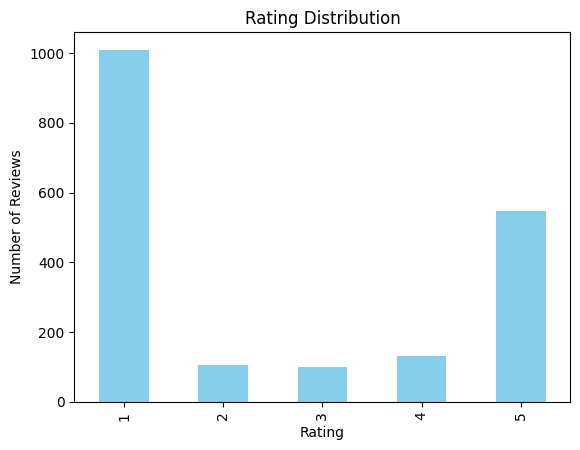

In [ ]:
import matplotlib.pyplot as plt

df['score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
# Step 1: Calculate overall average
average_rating = df['score'].mean()
print(f"Average Rating: {average_rating:.2f}")


Average Rating: 2.53


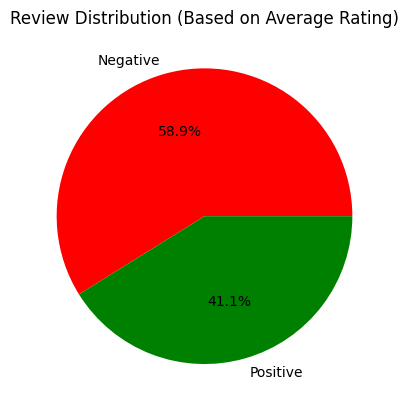

In [ ]:
# Step 2: Classify reviews based on average rating
def classify_sentiment(score):
    if score > average_rating + 0.1:
        return 'Positive'
    elif score < average_rating - 0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['score'].apply(classify_sentiment)

# Step 3: Visualize as pie chart
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['red', 'green', 'gray'],
    title='Review Distribution (Based on Average Rating)',
    ylabel=''
)
plt.show()


**Analyze how ratings change over time**

<ipython-input-17-af7ac6835872>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index('at').resample('Y')['score'].mean().plot(figsize=(10, 5), color='darkgreen', marker='o')


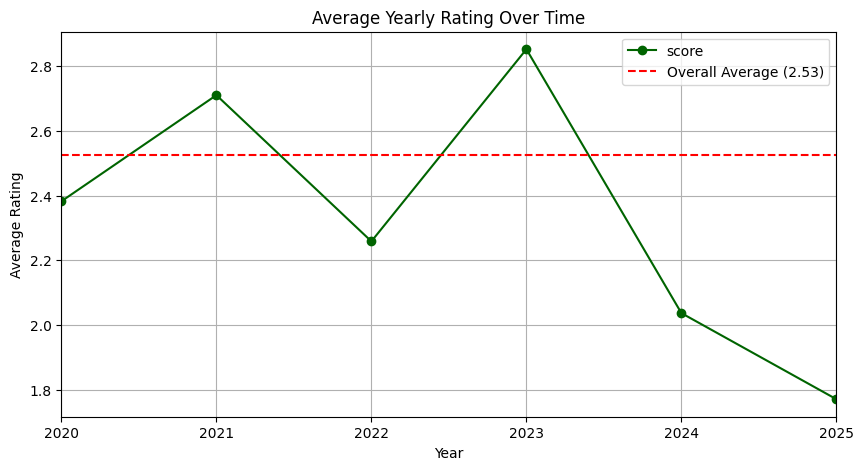

In [ ]:
df['at'] = pd.to_datetime(df['at'])
df.set_index('at').resample('Y')['score'].mean().plot(figsize=(10, 5), color='darkgreen', marker='o')

plt.title("Average Yearly Rating Over Time")
plt.ylabel("Average Rating")
plt.xlabel("Year")
plt.grid(True)

# Add broken horizontal line for average rating
plt.axhline(y=average_rating, color='red', linestyle='--', label=f'Overall Average ({average_rating:.2f})')
plt.legend()

plt.show()



Average Rating by Month:
year_month
2020-04    2.677419
2020-05    2.214286
2020-06    2.391304
2020-07    2.000000
2020-08    2.052632
             ...   
2025-01    2.307692
2025-02    2.285714
2025-03    1.727273
2025-04    1.437500
2025-05    1.857143
Freq: M, Name: score, Length: 62, dtype: float64


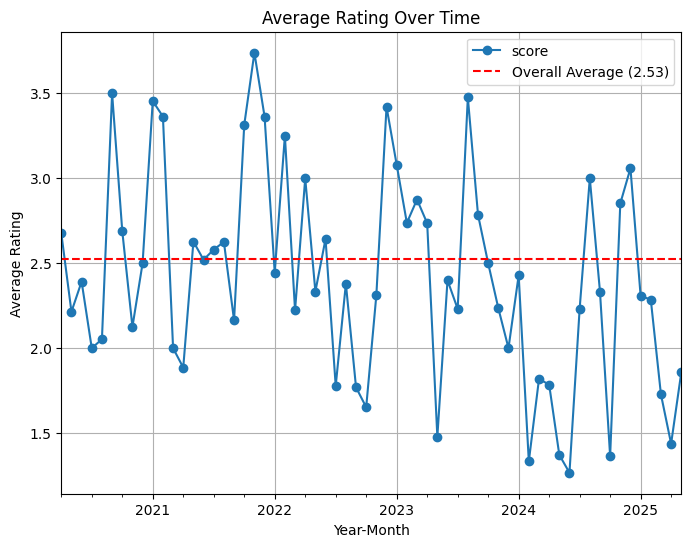

In [ ]:

df['year_month'] = df['at'].dt.to_period('M')

# Group by year-month and calculate average rating
temporal_ratings = df.groupby('year_month')['score'].mean()
print("\nAverage Rating by Month:")
print(temporal_ratings)

# Plot average rating over time
plt.figure(figsize=(8, 6))
temporal_ratings.plot(kind='line', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.grid(True)


# Add broken horizontal line for average rating
plt.axhline(y=average_rating, color='red', linestyle='--', label=f'Overall Average ({average_rating:.2f})')
plt.legend()
plt.savefig('temporal_ratings.png')
plt.show()



This indicate ratings from April 2020 to May 2025 — that’s over 5 years of data.

The average rating per month shows how users’ overall sentiment changes as the app develop. Average ratings rise in some months, that might indicate successful updates or fixes.

March and April 2025 have sharper drops which might be important to investigate further.



**Detect "False Positives" (High Ratings with Negative Text)**

Found 13 false positives:


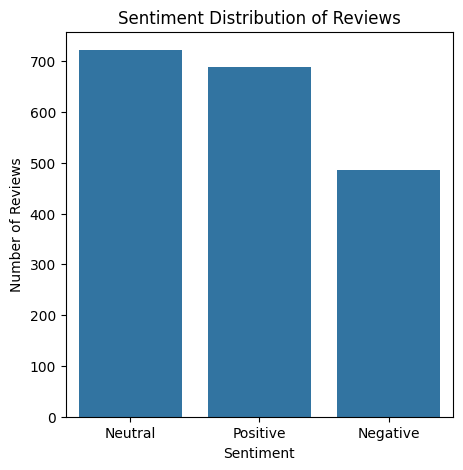

In [ ]:

# Calculate sentiment polarity (-1 to 1)
df['sentiment'] = df['cleaned_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
#  Create text labels
def get_sentiment_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

# suspicious reviews: High rating but negative text
df['false_positive'] = (df['score'] >= 4) & (df['sentiment'] < -0.3)
print(f"Found {df['false_positive'].sum()} false positives:")
# print(df[df['false_positive']][['content', 'score', 'sentiment']].head())

sentiment_counts = df['sentiment_label'].value_counts()

#  Plot sentiment distribution
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.savefig('sentiment_distribution.png')
plt.show()

False positives (13 cases) were detected where users gave high star ratings (4 or 5 stars) but wrote clearly negative review texts.

These may indicate user confusion, rating manipulation, or misclicks.

And a significant number of reviews were neutral in sentiment.

**Analsing Positive and negative reviews**


Top 10 Bigrams in Negative Reviews:
worst ever: 40
customer service: 24
data usage: 14
went wrong: 14
something went: 12
user experience: 10
user interface: 10
data balance: 10
ever used: 9
ever seen: 9


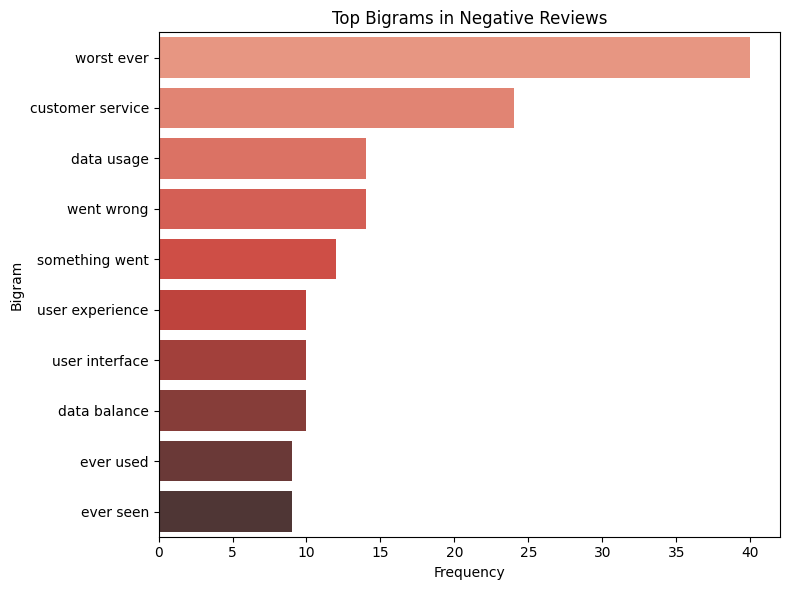


Top 10 Bigrams in Positive Reviews:
user friendly: 25
data balance: 10
good service: 9
full bugs: 7
says service: 7
pay bill: 7
many bugs: 6
good one: 6
check data: 6
excellent service: 6


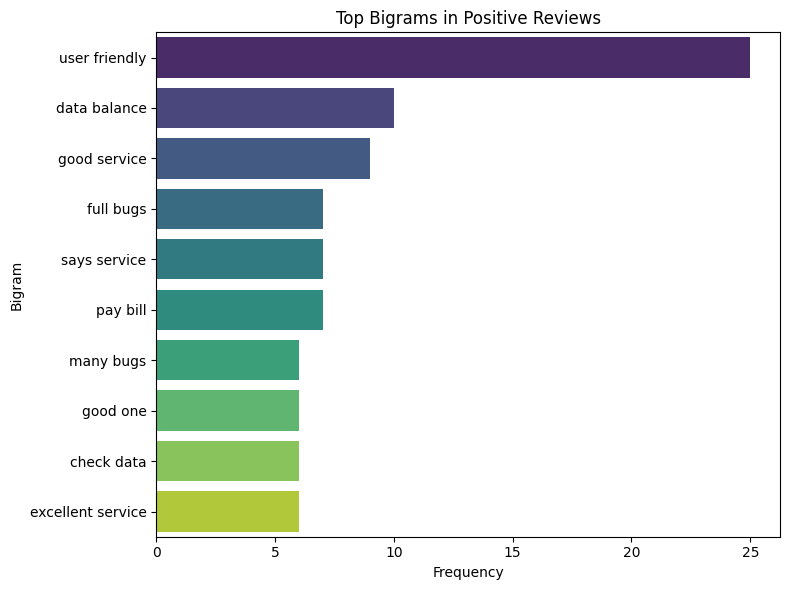

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Custom stopwords
extra_stopwords = {'app', 'even', 'also', 'use', 'would', 'could', 'slt'}
stop_words = set(stopwords.words('english')).union(extra_stopwords)

def extract_top_bigrams(reviews, label, n=10):
    phrases = []
    for review in reviews:
        tokens = [w.lower() for w in word_tokenize(review) if w.isalnum() and w.lower() not in stop_words]
        bigrams = ngrams(tokens, 2)  # Extract 2-word phrases
        phrases.extend([' '.join(bigram) for bigram in bigrams])

    # Count and get top N bigrams
    phrase_counts = Counter(phrases).most_common(n)
    print(f"\nTop {n} Bigrams in {label} Reviews:")
    for phrase, count in phrase_counts:
        print(f"{phrase}: {count}")

    # Plotting
    if phrase_counts:
        keywords, counts = zip(*phrase_counts)
        plt.figure(figsize=(8, 6))
        # Fix Seaborn warning by assigning 'hue' and disabling legend
        sns.barplot(x=counts, y=keywords, hue=keywords, palette="viridis" if label == "Positive" else "Reds_d", legend=False)
        plt.title(f'Top Bigrams in {label} Reviews')
        plt.xlabel('Frequency')
        plt.ylabel('Bigram')
        plt.tight_layout()
        plt.savefig(f'{label.lower()}_bigrams.png')
        plt.show()

# Assuming df is your DataFrame with 'content' and 'sentiment_label' columns
# Analyze NEGATIVE reviews
negative_reviews = df[df['sentiment_label'] == 'Negative']['content'].str.lower()
extract_top_bigrams(negative_reviews, "Negative")

# Analyze POSITIVE reviews
positive_reviews = df[df['sentiment_label'] == 'Positive']['content'].str.lower()
extract_top_bigrams(positive_reviews, "Positive")

Major Issues:
Customer Service: Users are frustrated with support, possibly due to slow responses or unhelpful interactions.
App Errors: Phrases like “went wrong” suggest frequent crashes or error messages, reducing reliability.
UI/UX: Complaints about “user experience” and “user interface” point to a clunky or confusing design.
Data Management: Issues with “data usage” and “data balance” may indicate inaccurate tracking, unclear displays, or unexpected data depletion.
Actionable Steps:
Prioritize debugging to reduce errors (e.g., investigate “something went wrong” messages).
Improve customer service training or response times.
Redesign the UI/UX for better navigation and clarity.
Enhance data tracking features to ensure accuracy and transparency.

**User Experience Pain Points by Feature**


Average Rating by Feature:
feature
contact_info    1.390625
login           1.402597
billing         1.720779
data_balance    1.768000
other           2.781843
Name: score, dtype: float64


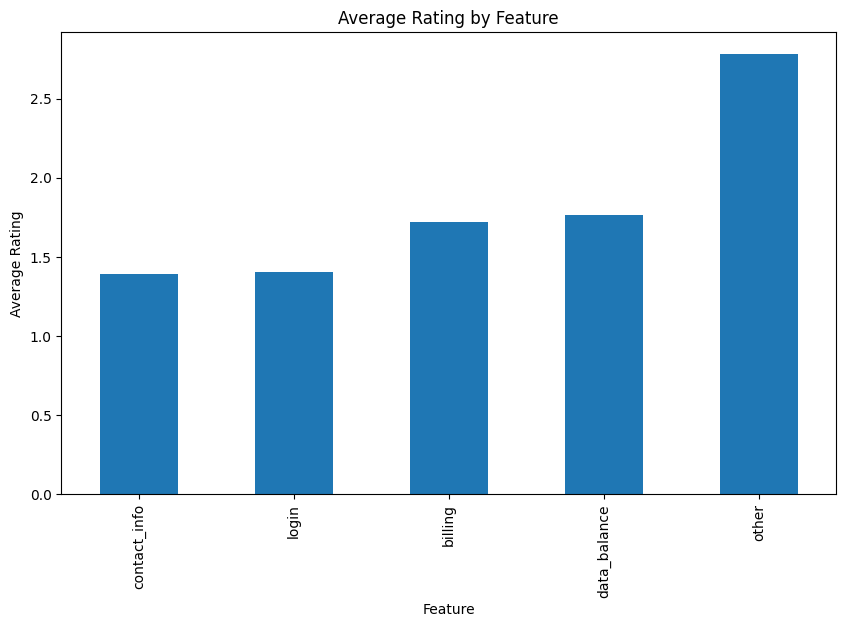


Number of Reviews by Feature:
feature
other           1476
billing          154
data_balance     125
login             77
contact_info      64
Name: count, dtype: int64


In [ ]:
# Define feature keywords
feature_keywords = {
    'contact_info': ['contact', 'email', 'phone', 'address'],
    'billing': ['bill', 'payment', 'pay'],
    'login': ['login', 'sign', 'access'],
    'data_balance': ['data', 'balance', 'usage']
}

# Function to categorize reviews
def categorize_review(text):
    text = text.lower()
    for feature, keywords in feature_keywords.items():
        if any(keyword in text for keyword in keywords):
            return feature
    return 'other'

# Apply categorization
df['feature'] = df['content'].apply(categorize_review)

# Group by feature and calculate average rating
feature_ratings = df.groupby('feature')['score'].mean().sort_values()
print("\nAverage Rating by Feature:")
print(feature_ratings)

# Plot average rating by feature
plt.figure(figsize=(10, 6))
feature_ratings.plot(kind='bar')
plt.title('Average Rating by Feature')
plt.xlabel('Feature')
plt.ylabel('Average Rating')
plt.savefig('feature_ratings.png')
plt.show()

# Count reviews per feature
feature_counts = df['feature'].value_counts()
print("\nNumber of Reviews by Feature:")
print(feature_counts)




****

**Impact of Review Influence**

Top 10 Bigrams in High Influence Reviews:
data usage: 21
data balance: 16
worst ever: 12
user friendly: 10
extra gb: 10
every time: 9
service temporarily: 9
customer service: 8
pay bill: 8
check data: 8


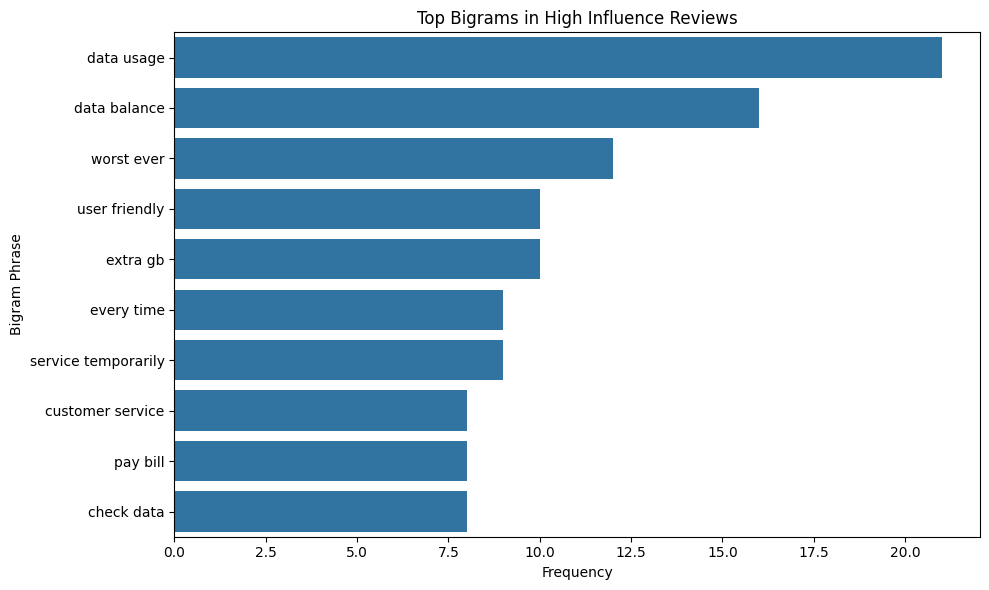

In [ ]:

from nltk.util import ngrams

extra_stopwords = {'app', 'even', 'also', 'use', 'would', 'could', 'slt', 'my', 'the', 'and'}
stop_words = set(stopwords.words('english')).union(extra_stopwords)

high_influence = df[df['thumbsUpCount'] > df['thumbsUpCount'].quantile(0.8)]
phrases = []

for review in high_influence['content'].str.lower():
    tokens = [w for w in word_tokenize(review) if w.isalnum() and w not in stop_words]
    bigrams = ngrams(tokens, 2)
    phrases.extend([' '.join(bigram) for bigram in bigrams])

phrase_counts = Counter(phrases).most_common(10)
print("Top 10 Bigrams in High Influence Reviews:")
for phrase, count in phrase_counts:
    print(f"{phrase}: {count}")

# Plot top bigrams
keywords, counts = zip(*phrase_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=keywords)
plt.title('Top Bigrams in High Influence Reviews')
plt.xlabel('Frequency')
plt.ylabel('Bigram Phrase')
plt.tight_layout()
plt.savefig('high_influence_bigrams.png')
plt.show()



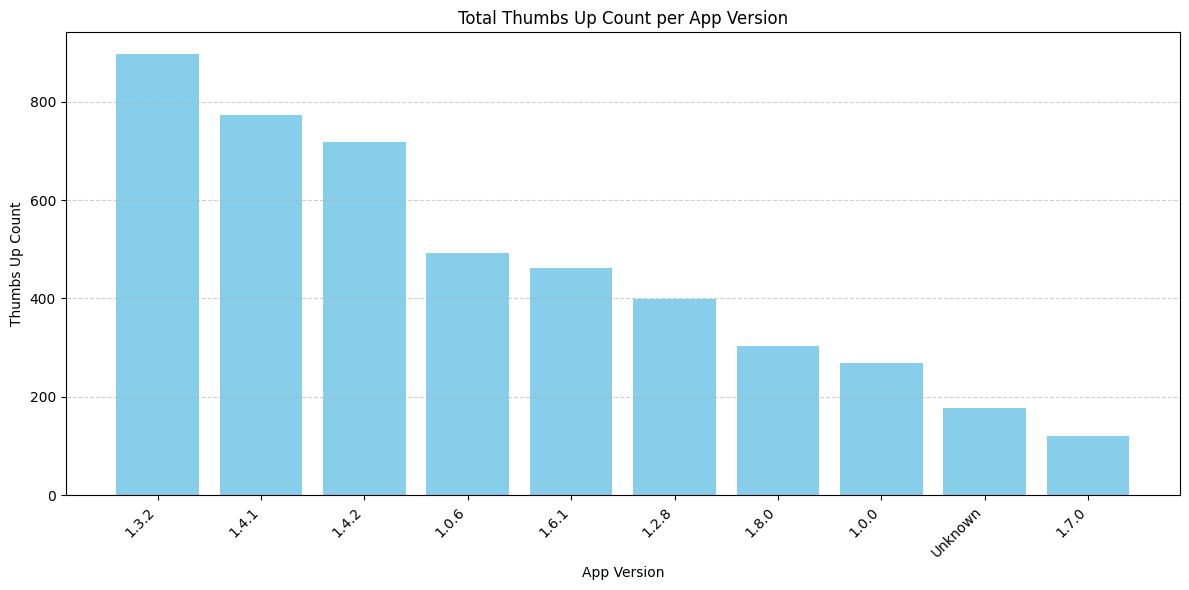

In [ ]:
# Filter versions with more than 50 entries
df_filtered = df.groupby('appVersion').filter(lambda x: len(x) > 50)

# Calculate total thumbs up per version
version_thumbs_up = df_filtered.groupby('appVersion')['thumbsUpCount'].sum().reset_index()
version_thumbs_up = version_thumbs_up.sort_values(by='thumbsUpCount', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(version_thumbs_up['appVersion'], version_thumbs_up['thumbsUpCount'], color='skyblue')
plt.title('Total Thumbs Up Count per App Version')
plt.xlabel('App Version')
plt.ylabel('Thumbs Up Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Version-Specific Issue Analysis**


Average Rating by App Version:


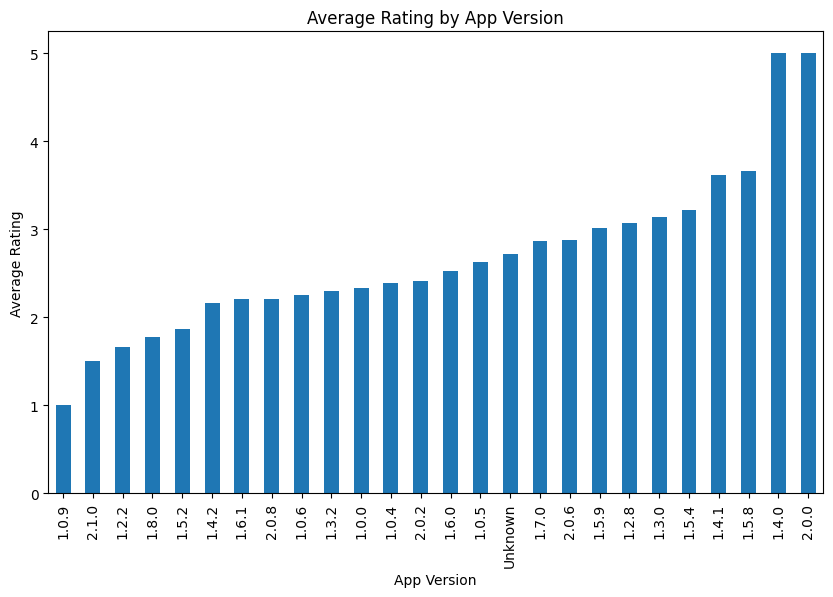

In [ ]:
# Group by appVersion and calculate average rating
version_ratings = df.groupby('appVersion')['score'].mean().sort_values()
print("\nAverage Rating by App Version:")
# print(version_ratings)

# Plot average rating by version
plt.figure(figsize=(10, 6))
version_ratings.plot(kind='bar')
plt.title('Average Rating by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Rating')
plt.savefig('version_ratings.png')
plt.show()




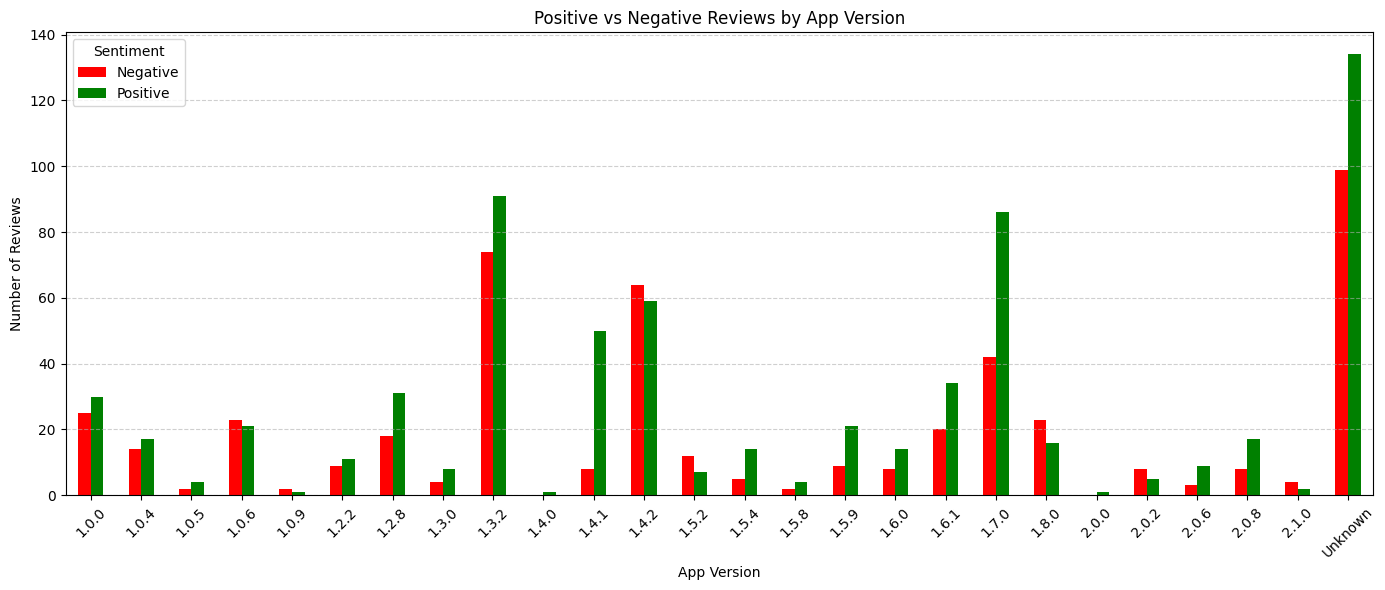

In [ ]:


# Filter only Positive and Negative reviews (drop Neutral for clarity)
filtered_df = df[df['sentiment_label'].isin(['Positive', 'Negative'])]

# Drop missing versions
filtered_df = filtered_df.dropna(subset=['reviewCreatedVersion'])

# Group by version and sentiment
sentiment_by_version = filtered_df.groupby(['reviewCreatedVersion', 'sentiment_label']).size().unstack(fill_value=0)

# Sort versions for better readability
sentiment_by_version = sentiment_by_version.sort_index()

# Plot grouped bar chart
ax = sentiment_by_version.plot(kind='bar', figsize=(14,6), color=['red', 'green'])

plt.title('Positive vs Negative Reviews by App Version')
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Random Forest Model Building


In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import joblib

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Validate required columns
required_columns = ['score', 'content', 'appVersion', 'thumbsUpCount', 'at']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

# Convert 'at' to datetime and create year_month
try:
    df['at'] = pd.to_datetime(df['at'], errors='coerce')
    if df['at'].isna().any():
        print("Warning: Some 'at' values could not be converted to datetime. Filling with mode.")
        df['at'] = df['at'].fillna(df['at'].mode()[0])
    df['year_month'] = df['at'].dt.to_period('M').astype(str)
    print("Created 'year_month' from 'at' column.")
except Exception as e:
    print(f"Warning: Could not create 'year_month' from 'at'. Error: {e}")
    print("Excluding 'year_month' from features.")
    use_year_month = False
else:
    use_year_month = True

# Create feature column using keyword-based categorization
feature_keywords = {
    'contact_info': ['contact', 'email', 'phone', 'address'],
    'billing': ['bill', 'payment', 'pay'],
    'login': ['login', 'sign', 'access'],
    'data_balance': ['data', 'balance', 'usage']
}

def categorize_review(text):
    if not isinstance(text, str):
        return 'other'
    text = text.lower()
    for feature, keywords in feature_keywords.items():
        if any(keyword in text for keyword in keywords):
            return feature
    return 'other'

df['feature'] = df['content'].apply(categorize_review)
print("Created 'feature' column. Value counts:")
print(df['feature'].value_counts())

# Handle missing appVersion
df['appVersion'] = df['appVersion'].fillna('Unknown')

# Add sentiment score using VADER
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Define bigrams to use
top_bigrams = [
    'data usage', 'data balance', 'worst ever', 'user friendly', 'extra gb',
    'every time', 'service temporarily', 'customer service', 'pay bill', 'check data'
]

# Function to count bigrams in a review
def count_bigrams(text):
    tokens = [w.lower() for w in word_tokenize(str(text)) if w.isalnum()]
    bigrams = [' '.join(bigram) for bigram in ngrams(tokens, 2)]
    return [bigrams.count(bigram) for bigram in top_bigrams]

# Apply bigram counting
bigram_counts = pd.DataFrame(df['content'].apply(count_bigrams).tolist(), columns=[f'bigram_{i}' for i in range(len(top_bigrams))])
df = pd.concat([df, bigram_counts], axis=1)

# Define features and target
feature_columns = ['feature', 'appVersion', 'thumbsUpCount', 'sentiment_score'] + [f'bigram_{i}' for i in range(len(top_bigrams))]
if use_year_month:
    feature_columns.insert(2, 'year_month')
X = df[feature_columns]
y = df['score']

# Define preprocessing pipeline
numeric_features = ['thumbsUpCount', 'sentiment_score'] + [f'bigram_{i}' for i in range(len(top_bigrams))]
categorical_features = ['feature', 'appVersion']
if use_year_month:
    categorical_features.append('year_month')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ])

# Apply preprocessing
try:
    X_preprocessed = preprocessor.fit_transform(X)
    feature_names = (
        numeric_features +
        list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
    )
    # Convert to DataFrame for inspection
    X_preprocessed_df = pd.DataFrame.sparse.from_spmatrix(X_preprocessed, columns=feature_names)
except Exception as e:
    raise RuntimeError(f"Preprocessing failed: {e}")

# Print shapes and sample for verification
print(f"Preprocessed X shape: {X_preprocessed.shape}")
print(f"y shape: {y.shape}")
print("\nSample of preprocessed features (first 5 rows):")
print(X_preprocessed_df.head())

# Save preprocessor for later use
joblib.dump(preprocessor, 'preprocessor.pkl')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Created 'year_month' from 'at' column.
Created 'feature' column. Value counts:
feature
other           1476
billing          154
data_balance     125
login             77
contact_info      64
Name: count, dtype: int64
Preprocessed X shape: (1896, 105)
y shape: (1896,)

Sample of preprocessed features (first 5 rows):
   thumbsUpCount  sentiment_score  bigram_0  bigram_1  bigram_2  bigram_3  \
0       -0.14899         0.536447 -0.119474 -0.103672  -0.04598 -0.137139   
1       -0.14899         1.524753 -0.119474 -0.103672  -0.04598 -0.137139   
2       0.406081        -0.380139 -0.119474 -0.103672  -0.04598 -0.137139   
3      -0.102734        -0.383828 -0.119474 -0.103672  -0.04598 -0.137139   
4      -0.102734        -1.866185 -0.119474 -0.103672  -0.04598 -0.137139   

   bigram_4  bigram_5  bigram_6  bigram_7  ...  year_month_2024-08  \
0 -0.103252 -0.103252 -0.079809 -0.116991  ...                   0   
1 -0.103252 -0.103252 -0.079809 -0.116991  ...                   0   
2 -0.1032

['preprocessor.pkl']

**Model Training**

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import joblib


# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# # Define Random Forest model
# rf = RandomForestRegressor(random_state=42)

# # Define hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# try:
#     grid_search.fit(X_train, y_train)
#     print("Best parameters:", grid_search.best_params_)
#     print("Best cross-validation score (neg MSE):", grid_search.best_score_)
# except Exception as e:
#     raise RuntimeError(f"Model training failed: {e}")

# # Get the best model
# best_rf = grid_search.best_estimator_

# # Predict on test set
# y_pred = best_rf.predict(X_test)


# # Save the trained model
# joblib.dump(best_rf, 'random_forest_model.pkl')
# print("Model saved as 'random_forest_model.pkl'")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42
)

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
try:
    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score (accuracy):", grid_search.best_score_)
except Exception as e:
    raise RuntimeError(f"Model training failed: {e}")

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Save the trained model
joblib.dump(best_rf, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.71044163626889
Model saved as 'random_forest_model.pkl'


**Evaluation**


Model Evaluation:
- Training Accuracy: 0.7830
- Test Accuracy:    0.7105


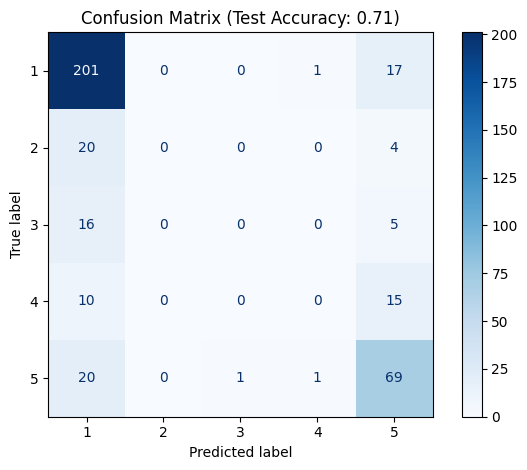

['evaluation_results.pkl']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Load model and data
best_rf = joblib.load('random_forest_model.pkl')

# Predictions (training and test)
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Discretize predictions (round to 1-5)
y_train_pred_int = np.round(y_train_pred).clip(1, 5).astype(int)
y_test_pred_int = np.round(y_test_pred).clip(1, 5).astype(int)
y_train_int = np.round(y_train).clip(1, 5).astype(int)
y_test_int = np.round(y_test).clip(1, 5).astype(int)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_int, y_train_pred_int)
test_accuracy = accuracy_score(y_test_int, y_test_pred_int)

# Regression metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel Evaluation:")
print(f"- Training Accuracy: {train_accuracy:.4f}")
print(f"- Test Accuracy:    {test_accuracy:.4f}")
# print(f"- Test RMSE:        {test_rmse:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_int, y_test_pred_int, labels=[1,2,3,4,5])

disp = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Test Accuracy: {test_accuracy:.2f})')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Save results
joblib.dump({
    'train_accuracy': train_accuracy,
    'test_accuracy': test_accuracy,
    'confusion_matrix': cm
}, 'evaluation_results.pkl')

In [ ]:
from google.colab import files
files.download('preprocessor.pkl')
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Rebuild the AI model to automated the analysis

In [ ]:
!pip install google-play-scraper pandas nltk scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00


In [ ]:

import pandas as pd
from google_play_scraper import reviews_all, Sort
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import pickle
import sys
from datetime import datetime
import numpy as np


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


In [ ]:
# Scrape all reviews
package_name = 'com.slt.selfcare'
result = reviews_all(package_name, lang='en', country='lk', sort=Sort.NEWEST)
df = pd.DataFrame(result)

In [ ]:
# Check if DataFrame is empty or 'at' column is missing
if df.empty or 'at' not in df.columns:
    print("No reviews found or 'at' column missing. Check package name, language, or country settings.")
    sys.exit(1)

In [ ]:
# Convert 'at' to datetime and handle missing values
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df = df.dropna(subset=['at', 'content'])
df['content'] = df['content'].astype(str)

In [ ]:

# Save all reviews to CSV
df.to_csv('reviews_all.csv', index=False)

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# Extract user requests and their timestamps
def extract_requests_with_timestamps(reviews_df):
    request_phrases = ["i wish", "please add", "it would be great if", "can you", "hope to see", "would like",
                       "need to", "should have", "want to", "add a", "make it"]
    requests = []
    timestamps = []
    for idx, row in reviews_df.iterrows():
        review = row['content']
        timestamp = row['at']
        sentences = nltk.sent_tokenize(review)
        for sentence in sentences:
            if any(phrase in sentence.lower() for phrase in request_phrases):
                cleaned_sentence = preprocess_text(sentence)
                if len(cleaned_sentence) > 0:
                    requests.append(cleaned_sentence)
                    timestamps.append(timestamp)
    return requests, timestamps

In [ ]:
# Extract and preprocess requests
requests, request_timestamps = extract_requests_with_timestamps(df)

In [ ]:
# Check if there are enough requests for clustering
if len(requests) == 0:
    print("No user requests found in the reviews after preprocessing.")
    sys.exit(1)
# Vectorize requests
stop_words = list(set(stopwords.words('english')))
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=2000)  # Increased max_features
X = vectorizer.fit_transform(requests)

# Optimize n_clusters using silhouette analysis
if len(requests) < 2:
    print("Not enough requests to cluster (minimum 2 required).")
    sys.exit(1)

best_n_clusters = 2
best_silhouette = -1
for n in range(2, min(6, len(requests) + 1)):
    kmeans_temp = KMeans(n_clusters=n, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X)
    if len(set(labels_temp)) > 1:
        score = silhouette_score(X, labels_temp)
        if score > best_silhouette:
            best_silhouette = score
            best_n_clusters = n

n_clusters = best_n_clusters
print(f"Optimal number of clusters: {n_clusters}")

# Split data into training and test sets
X_train, X_test, requests_train, requests_test = train_test_split(X, requests, test_size=0.2, random_state=42)

# Cluster training data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_labels = kmeans.fit_predict(X_train)

# Evaluate clustering with silhouette score
if n_clusters > 1 and len(set(train_labels)) > 1:
    train_silhouette = silhouette_score(X_train, train_labels)
    print(f"Training Silhouette Score: {train_silhouette:.4f}")
else:
    print("Silhouette score cannot be computed (single cluster or insufficient samples).")
    train_silhouette = None

# Predict clusters for test data
test_labels = kmeans.predict(X_test)


Optimal number of clusters: 3
Training Silhouette Score: 0.0229


In [ ]:
# Evaluate test data with silhouette score
if n_clusters > 1 and len(set(test_labels)) > 1:
    test_silhouette = silhouette_score(X_test, test_labels)
    print(f"Test Silhouette Score: {test_silhouette:.4f}")
else:
    print("Test silhouette score cannot be computed (single cluster or insufficient samples).")
    test_silhouette = None


Test Silhouette Score: -0.0080


In [ ]:
# Cluster distribution for stability analysis
from collections import Counter
train_cluster_counts = Counter(train_labels)
test_cluster_counts = Counter(test_labels)
print("\nCluster distribution in training set:", dict(train_cluster_counts))
print("Cluster distribution in test set:", dict(test_cluster_counts))

# Get cluster labels for all requests
all_labels = kmeans.predict(X)

# Save the vectorizer, model, labels, and requests
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('train_labels.pkl', 'wb') as f:
    pickle.dump(train_labels, f)
with open('test_labels.pkl', 'wb') as f:
    pickle.dump(test_labels, f)
with open('requests.pkl', 'wb') as f:
    pickle.dump(requests, f)


Cluster distribution in training set: {np.int32(0): 28, np.int32(1): 19, np.int32(2): 14}
Cluster distribution in test set: {np.int32(2): 1, np.int32(1): 6, np.int32(0): 9}


In [ ]:
# Save preprocessed requests with cluster labels and timestamps for Streamlit
results_df = pd.DataFrame({
    'request': requests,
    'cluster': all_labels,
    'timestamp': request_timestamps
})
results_df.to_csv('clustered_requests.csv', index=False)

In [ ]:
# Download files for use in Streamlit
from google.colab import files
files.download('reviews_all.csv')
files.download('vectorizer.pkl')
files.download('kmeans_model.pkl')
files.download('train_labels.pkl')
files.download('test_labels.pkl')
files.download('requests.pkl')
files.download('clustered_requests.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Competitors

In [1]:

# # Install dependencies
# !pip install google-play-scraper pandas nltk scikit-learn streamlit pyngrok

# import pandas as pd
# from google_play_scraper import reviews_all, Sort
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.model_selection import train_test_split
# import pickle
# from collections import Counter
# import sys
# from datetime import datetime
# import numpy as np
# from google.colab import drive

# # Mount Google Drive for saving outputs
# drive.mount('/content/drive')

# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('punkt_tab')
# nltk.download('wordnet')

# # Initialize lemmatizer
# lemmatizer = WordNetLemmatizer()

# # Define apps
# apps = {
#     'MySLT': 'com.slt.selfcare',
#     'Mobitel': 'com.mobitel.selfcare',
#     'Dialog': 'net.omobio.dialogsc'
# }

# # Preprocessing function
# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r'[^a-z\s.,!?]', '', text)
#     text = re.sub(r'\s+', ' ', text).strip()
#     tokens = word_tokenize(text)
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     tokens = [lemmatizer.lemmatize(word) for word in tokens]
#     return ' '.join(tokens)

# # Extract user requests and timestamps
# def extract_requests_with_timestamps(reviews_df):
#     request_phrases = ["i wish", "please add", "it would be great if", "can you", "hope to see", "would like",
#                        "need to", "should have", "want to", "add a", "make it"]
#     requests = []
#     timestamps = []
#     for idx, row in reviews_df.iterrows():
#         review = row['content']
#         timestamp = row['at']
#         sentences = nltk.sent_tokenize(review)
#         for sentence in sentences:
#             if any(phrase in sentence.lower() for phrase in request_phrases):
#                 cleaned_sentence = preprocess_text(sentence)
#                 if len(cleaned_sentence) > 0:
#                     requests.append(cleaned_sentence)
#                     timestamps.append(timestamp)
#     return requests, timestamps

# # Process reviews for a single app
# def process_app_reviews(package_name, app_name):
#     print(f"Scraping reviews for {app_name} ({package_name})...")
#     try:
#         result = reviews_all(package_name, lang='en', country='lk', sort=Sort.NEWEST)
#         df = pd.DataFrame(result)
#     except Exception as e:
#         print(f"Error scraping reviews for {app_name}: {e}")
#         return None, None, None

#     if df.empty or 'at' not in df.columns:
#         print(f"No reviews found or 'at' column missing for {app_name}.")
#         return None, None, None

#     df['at'] = pd.to_datetime(df['at'], errors='coerce')
#     df = df.dropna(subset=['at', 'content'])
#     df['content'] = df['content'].astype(str)

#     requests, request_timestamps = extract_requests_with_timestamps(df)
#     if len(requests) == 0:
#         print(f"No user requests found for {app_name}.")
#         return None, None, None

#     stop_words = list(set(stopwords.words('english')))
#     vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=2000)
#     X = vectorizer.fit_transform(requests)

#     if len(requests) < 2:
#         print(f"Not enough requests to cluster for {app_name}.")
#         return None, None, None

#     best_n_clusters = 2
#     best_silhouette = -1
#     for n in range(2, min(6, len(requests) + 1)):
#         kmeans_temp = KMeans(n_clusters=n, random_state=42)
#         labels_temp = kmeans_temp.fit_predict(X)
#         if len(set(labels_temp)) > 1:
#             score = silhouette_score(X, labels_temp)
#             if score > best_silhouette:
#                 best_silhouette = score
#                 best_n_clusters = n

#     n_clusters = best_n_clusters
#     print(f"Optimal number of clusters for {app_name}: {n_clusters}")

#     X_train, X_test, requests_train, requests_test = train_test_split(X, requests, test_size=0.2, random_state=42)
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     train_labels = kmeans.fit_predict(X_train)

#     if n_clusters > 1 and len(set(train_labels)) > 1:
#         train_silhouette = silhouette_score(X_train, train_labels)
#         print(f"Training Silhouette Score for {app_name}: {train_silhouette:.4f}")
#     else:
#         print(f"Silhouette score cannot be computed for {app_name}.")
#         train_silhouette = None

#     test_labels = kmeans.predict(X_test)
#     train_cluster_counts = Counter(train_labels)
#     test_cluster_counts = Counter(test_labels)
#     print(f"Cluster distribution in training set for {app_name}: {dict(train_cluster_counts)}")
#     print(f"Cluster distribution in test set for {app_name}: {dict(test_cluster_counts)}")

#     all_labels = kmeans.predict(X)
#     results_df = pd.DataFrame({
#         'request': requests,
#         'cluster': all_labels,
#         'timestamp': request_timestamps,
#         'app': app_name
#     })
#     results_df.to_csv(f'/content/drive/MyDrive/clustered_requests_{app_name}.csv', index=False)

#     return results_df, vectorizer, kmeans

# # Compare clusters across apps
# def compare_clusters(app_results):
#     all_requests = [df for df in app_results.values() if df is not None]
#     if not all_requests:
#         print("No data available for comparison.")
#         return None

#     combined_df = pd.concat(all_requests, ignore_index=True)
#     cluster_summary = combined_df.groupby(['app', 'cluster']).agg({
#         'request': ['count', lambda x: '; '.join(x)],
#         'timestamp': ['min', 'max']
#     }).reset_index()
#     cluster_summary.columns = ['app', 'cluster', 'request_count', 'request_examples', 'earliest_timestamp', 'latest_timestamp']
#     cluster_summary.to_csv('/content/drive/MyDrive/cluster_comparison.csv', index=False)

#     print("\nCluster Comparison Summary:")
#     print(cluster_summary)

#     for app_name in apps.keys():
#         if app_name in combined_df['app'].values:
#             app_clusters = cluster_summary[cluster_summary['app'] == app_name]['cluster'].unique()
#             print(f"\nUnique cluster themes for {app_name}:")
#             for cluster in app_clusters:
#                 cluster_data = cluster_summary[(cluster_summary['app'] == app_name) & (cluster_summary['cluster'] == cluster)]
#                 print(f"Cluster {cluster}: {cluster_data['request_examples'].iloc[0][:200]}... ({cluster_data['request_count'].iloc[0]} requests)")

#     print("\nCommon themes across apps:")
#     for cluster1 in cluster_summary['cluster'].unique():
#         for cluster2 in cluster_summary['cluster'].unique():
#             if cluster1 < cluster2:
#                 requests1 = set(cluster_summary[cluster_summary['cluster'] == cluster1]['request_examples'].str.split('; ').explode())
#                 requests2 = set(cluster_summary[cluster_summary['cluster'] == cluster2]['request_examples'].str.split('; ').explode())
#                 common = requests1.intersection(requests2)
#                 if len(common) > 0:
#                     print(f"Clusters {cluster1} and {cluster2} share {len(common)} common requests, e.g., {list(common)[:5]}")

#     return cluster_summary

# # Main execution
# app_results = {}
# for app_name, package_name in apps.items():
#     results_df, vectorizer, kmeans = process_app_reviews(package_name, app_name)
#     app_results[app_name] = results_df

# # Compare clusters
# cluster_summary = compare_clusters(app_results)



In [ ]:
# from google.colab import files
# files.download('/content/drive/MyDrive/cluster_comparison.csv')
# files.download('/content/drive/MyDrive/clustered_requests_MySLT.csv')
# files.download('/content/drive/MyDrive/clustered_requests_Mobitel.csv')
# files.download('/content/drive/MyDrive/clustered_requests_Dialog.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install google-play-scraper pandas nltk scikit-learn


In [3]:
     !pip install google-play-scraper pandas nltk scikit-learn

     import pandas as pd
     from google_play_scraper import reviews_all, Sort
     import nltk
     from nltk.corpus import stopwords
     from nltk.tokenize import word_tokenize
     from nltk.stem import WordNetLemmatizer
     import re
     from sklearn.feature_extraction.text import TfidfVectorizer
     from sklearn.cluster import KMeans
     from sklearn.metrics import silhouette_score
     from sklearn.model_selection import train_test_split
     import pickle
     import sys
     from datetime import datetime
     import numpy as np

     # Download NLTK resources
     nltk.download('punkt')
     nltk.download('stopwords')
     nltk.download('punkt_tab')
     nltk.download('wordnet')

     # Initialize lemmatizer
     lemmatizer = WordNetLemmatizer()

     # Define apps
     apps = {
         'MySLT': 'com.slt.selfcare',
         'Mobitel': 'com.mobitel.selfcare',
         'Dialog': 'net.omobio.dialogsc'
     }

     for app_name, package_name in apps.items():
         print(f"Processing {app_name} ({package_name})...")

         # Scrape all reviews
         result = reviews_all(package_name, lang='en', country='lk', sort=Sort.NEWEST)
         df = pd.DataFrame(result)

         # Check if DataFrame is empty or 'at' column is missing
         if df.empty or 'at' not in df.columns:
             print(f"No reviews found or 'at' column missing for {app_name}. Check package name, language, or country settings.")
             continue

         # Convert 'at' to datetime and handle missing values
         df['at'] = pd.to_datetime(df['at'], errors='coerce')
         df = df.dropna(subset=['at', 'content'])
         df['content'] = df['content'].astype(str)

         # Save all reviews to CSV
         df.to_csv(f'reviews_{app_name}.csv', index=False)

         # Preprocessing function
         def preprocess_text(text):
             text = text.lower()
             text = re.sub(r'[^a-z\s.,!?]', '', text)
             text = re.sub(r'\s+', ' ', text).strip()
             tokens = word_tokenize(text)
             stop_words = set(stopwords.words('english'))
             tokens = [word for word in tokens if word not in stop_words]
             tokens = [lemmatizer.lemmatize(word) for word in tokens]
             return ' '.join(tokens)

         # Extract user requests and their timestamps
         def extract_requests_with_timestamps(reviews_df):
             request_phrases = ["i wish", "please add", "it would be great if", "can you", "hope to see", "would like",
                                "need to", "should have", "want to", "add a", "make it"]
             requests = []
             timestamps = []
             for idx, row in reviews_df.iterrows():
                 review = row['content']
                 timestamp = row['at']
                 sentences = nltk.sent_tokenize(review)
                 for sentence in sentences:
                     if any(phrase in sentence.lower() for phrase in request_phrases):
                         cleaned_sentence = preprocess_text(sentence)
                         if len(cleaned_sentence) > 0:
                             requests.append(cleaned_sentence)
                             timestamps.append(timestamp)
             return requests, timestamps

         # Extract and preprocess requests
         requests, request_timestamps = extract_requests_with_timestamps(df)

         # Check if there are enough requests for clustering
         if len(requests) == 0:
             print(f"No user requests found in the reviews for {app_name} after preprocessing.")
             continue

         # Vectorize requests
         stop_words = list(set(stopwords.words('english')))
         vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=2000)
         X = vectorizer.fit_transform(requests)

         # Optimize n_clusters using silhouette analysis
         if len(requests) < 2:
             print(f"Not enough requests to cluster for {app_name} (minimum 2 required).")
             continue

         best_n_clusters = 2
         best_silhouette = -1
         for n in range(2, min(6, len(requests) + 1)):
             kmeans_temp = KMeans(n_clusters=n, random_state=42)
             labels_temp = kmeans_temp.fit_predict(X)
             if len(set(labels_temp)) > 1:
                 score = silhouette_score(X, labels_temp)
                 if score > best_silhouette:
                     best_silhouette = score
                     best_n_clusters = n

         n_clusters = best_n_clusters
         print(f"Optimal number of clusters for {app_name}: {n_clusters}")

         # Split data into training and test sets
         X_train, X_test, requests_train, requests_test = train_test_split(X, requests, test_size=0.2, random_state=42)

         # Cluster training data
         kmeans = KMeans(n_clusters=n_clusters, random_state=42)
         train_labels = kmeans.fit_predict(X_train)

         # Evaluate clustering with silhouette score
         if n_clusters > 1 and len(set(train_labels)) > 1:
             train_silhouette = silhouette_score(X_train, train_labels)
             print(f"Training Silhouette Score for {app_name}: {train_silhouette:.4f}")
         else:
             print(f"Silhouette score cannot be computed for {app_name} (single cluster or insufficient samples).")
             train_silhouette = None

         # Predict clusters for test data
         test_labels = kmeans.predict(X_test)
         if n_clusters > 1 and len(set(test_labels)) > 1:
             test_silhouette = silhouette_score(X_test, test_labels)
             print(f"Test Silhouette Score for {app_name}: {test_silhouette:.4f}")
         else:
             print(f"Test silhouette score cannot be computed for {app_name} (single cluster or insufficient samples).")
             test_silhouette = None

         # Cluster distribution for stability analysis
         from collections import Counter
         train_cluster_counts = Counter(train_labels)
         test_cluster_counts = Counter(test_labels)
         print(f"\nCluster distribution in training set for {app_name}: {dict(train_cluster_counts)}")
         print(f"Cluster distribution in test set for {app_name}: {dict(test_cluster_counts)}")

         # Get cluster labels for all requests
         all_labels = kmeans.predict(X)

         # Save the vectorizer, model, labels, and requests
         with open(f'vectorizer_{app_name}.pkl', 'wb') as f:
             pickle.dump(vectorizer, f)
         with open(f'kmeans_model_{app_name}.pkl', 'wb') as f:
             pickle.dump(kmeans, f)
         with open(f'train_labels_{app_name}.pkl', 'wb') as f:
             pickle.dump(train_labels, f)
         with open(f'test_labels_{app_name}.pkl', 'wb') as f:
             pickle.dump(test_labels, f)
         with open(f'requests_{app_name}.pkl', 'wb') as f:
             pickle.dump(requests, f)

         # Save preprocessed requests with cluster labels and timestamps for Streamlit
         results_df = pd.DataFrame({
             'request': requests,
             'cluster': all_labels,
             'timestamp': request_timestamps,
             'app': app_name  # Add app name for multi-app compatibility
         })
         results_df.to_csv(f'clustered_requests_{app_name}.csv', index=False)

     # Download files for use in Streamlit
     from google.colab import files
     for app_name in apps.keys():
         files.download(f'reviews_{app_name}.csv')
         files.download(f'vectorizer_{app_name}.pkl')
         files.download(f'kmeans_model_{app_name}.pkl')
         files.download(f'train_labels_{app_name}.pkl')
         files.download(f'test_labels_{app_name}.pkl')
         files.download(f'requests_{app_name}.pkl')
         files.download(f'clustered_requests_{app_name}.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Processing MySLT (com.slt.selfcare)...
Optimal number of clusters for MySLT: 3
Training Silhouette Score for MySLT: 0.0229
Test Silhouette Score for MySLT: -0.0080

Cluster distribution in training set for MySLT: {np.int32(0): 28, np.int32(1): 19, np.int32(2): 14}
Cluster distribution in test set for MySLT: {np.int32(2): 1, np.int32(1): 6, np.int32(0): 9}
Processing Mobitel (com.mobitel.selfcare)...
Optimal number of clusters for Mobitel: 3
Training Silhouette Score for Mobitel: 0.0174
Test Silhouette Score for Mobitel: 0.0193

Cluster distribution in training set for Mobitel: {np.int32(0): 35, np.int32(1): 67, np.int32(2): 60}
Cluster distribution in test set for Mobitel: {np.int32(0): 7, np.int32(1): 20, np.int32(2): 14}
Processing Dialog (net.omobio.dialogsc)...
Optimal number of clusters for Dialog: 5
Training Silhouette Score for Dialog: 0.0195
Test Silhouette Score for Dialog: 0.0160

Cluster distribution in training set for Dialog: {np.int32(0): 197, np.int32(2): 218, np.int32(3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>